<a href="https://colab.research.google.com/github/lorenzoridolfi9/Football-Player-Detection/blob/main/Football_Players_Detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat May 20 13:49:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# set the working directory
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# install libraries
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [ ]:
# import libraries
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#create dataset folder
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [ ]:
# install and import roboflow
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="4KSDHCVPScYlHCclrmCO")
project = rf.workspace("lorenzo-ridolfi-kqivd").project("football-players-detection-bezwg")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Football-Players-Detection-3 in yolov8:: 100%|██████████| 1338/1338 [00:00<00:00, 2307.71it/s]


In [ ]:
# train the model
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Football-Players-Detection-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=F

In [ ]:
# list of documents
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch510.jpg
events.out.tfevents.1684586284.c3d187482dd7.1522.0  train_batch511.jpg
F1_curve.png					    train_batch512.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


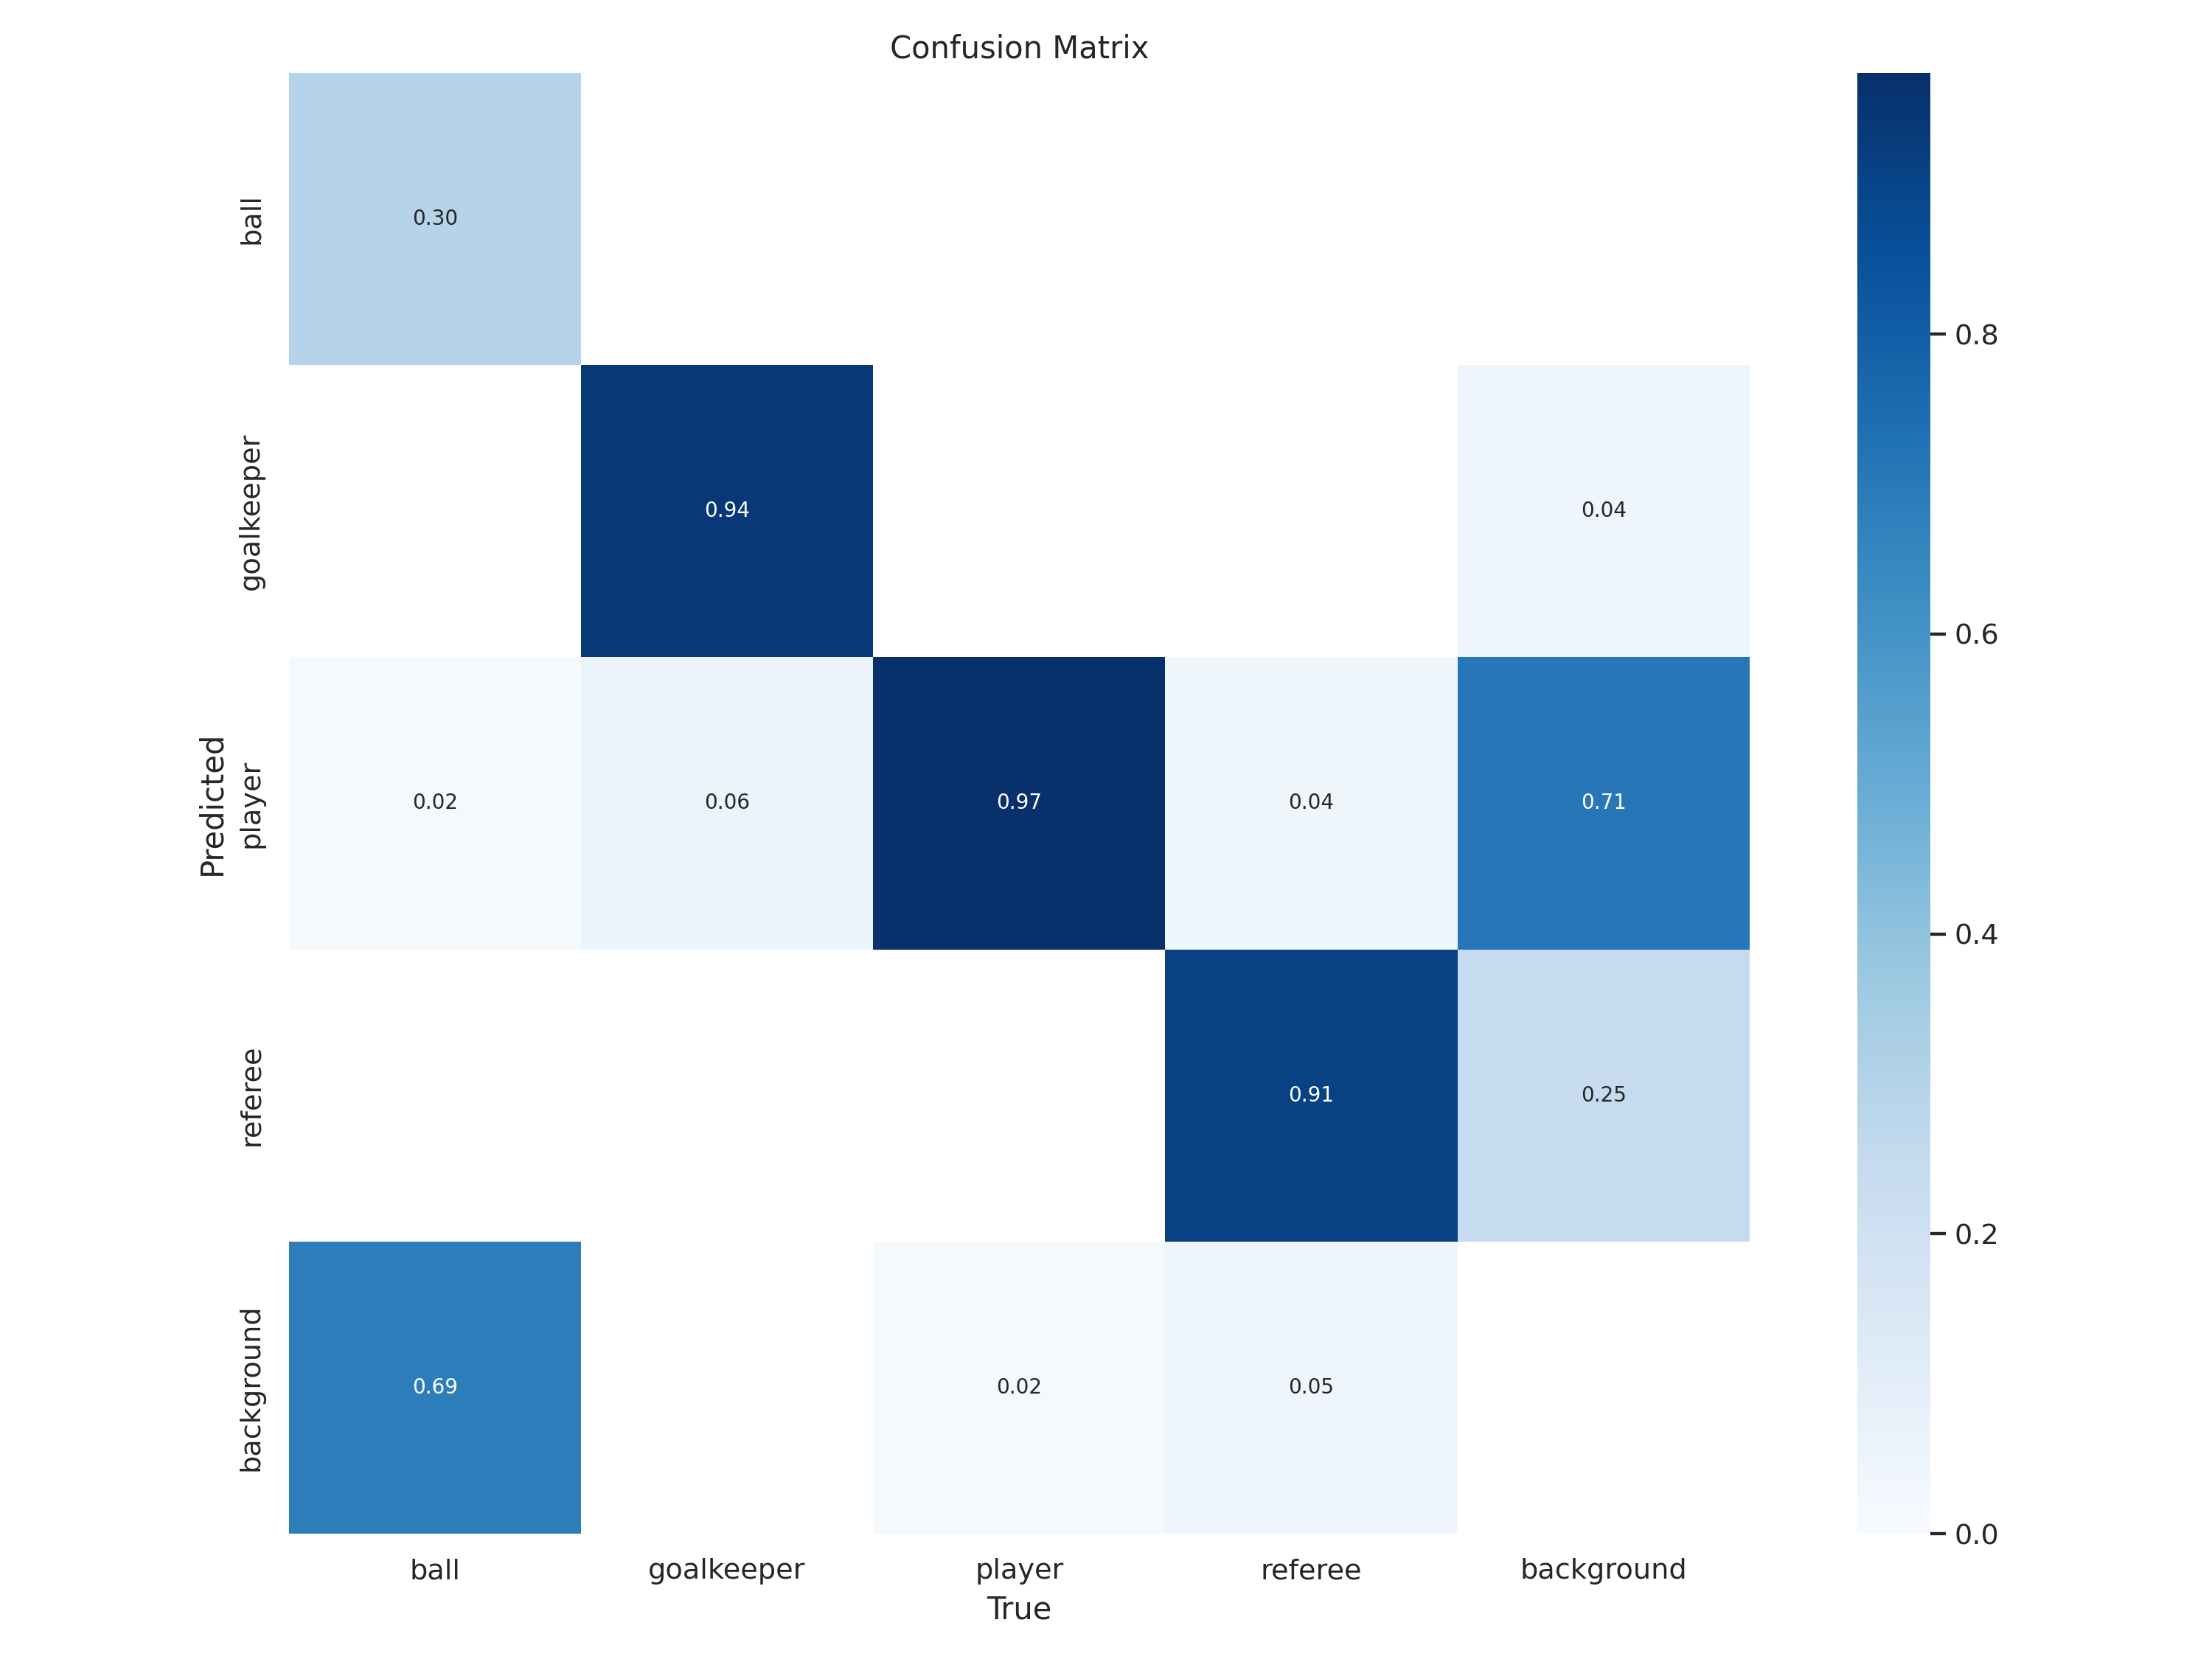

In [ ]:
# print confusion matrix
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
# print the metrics an loss
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


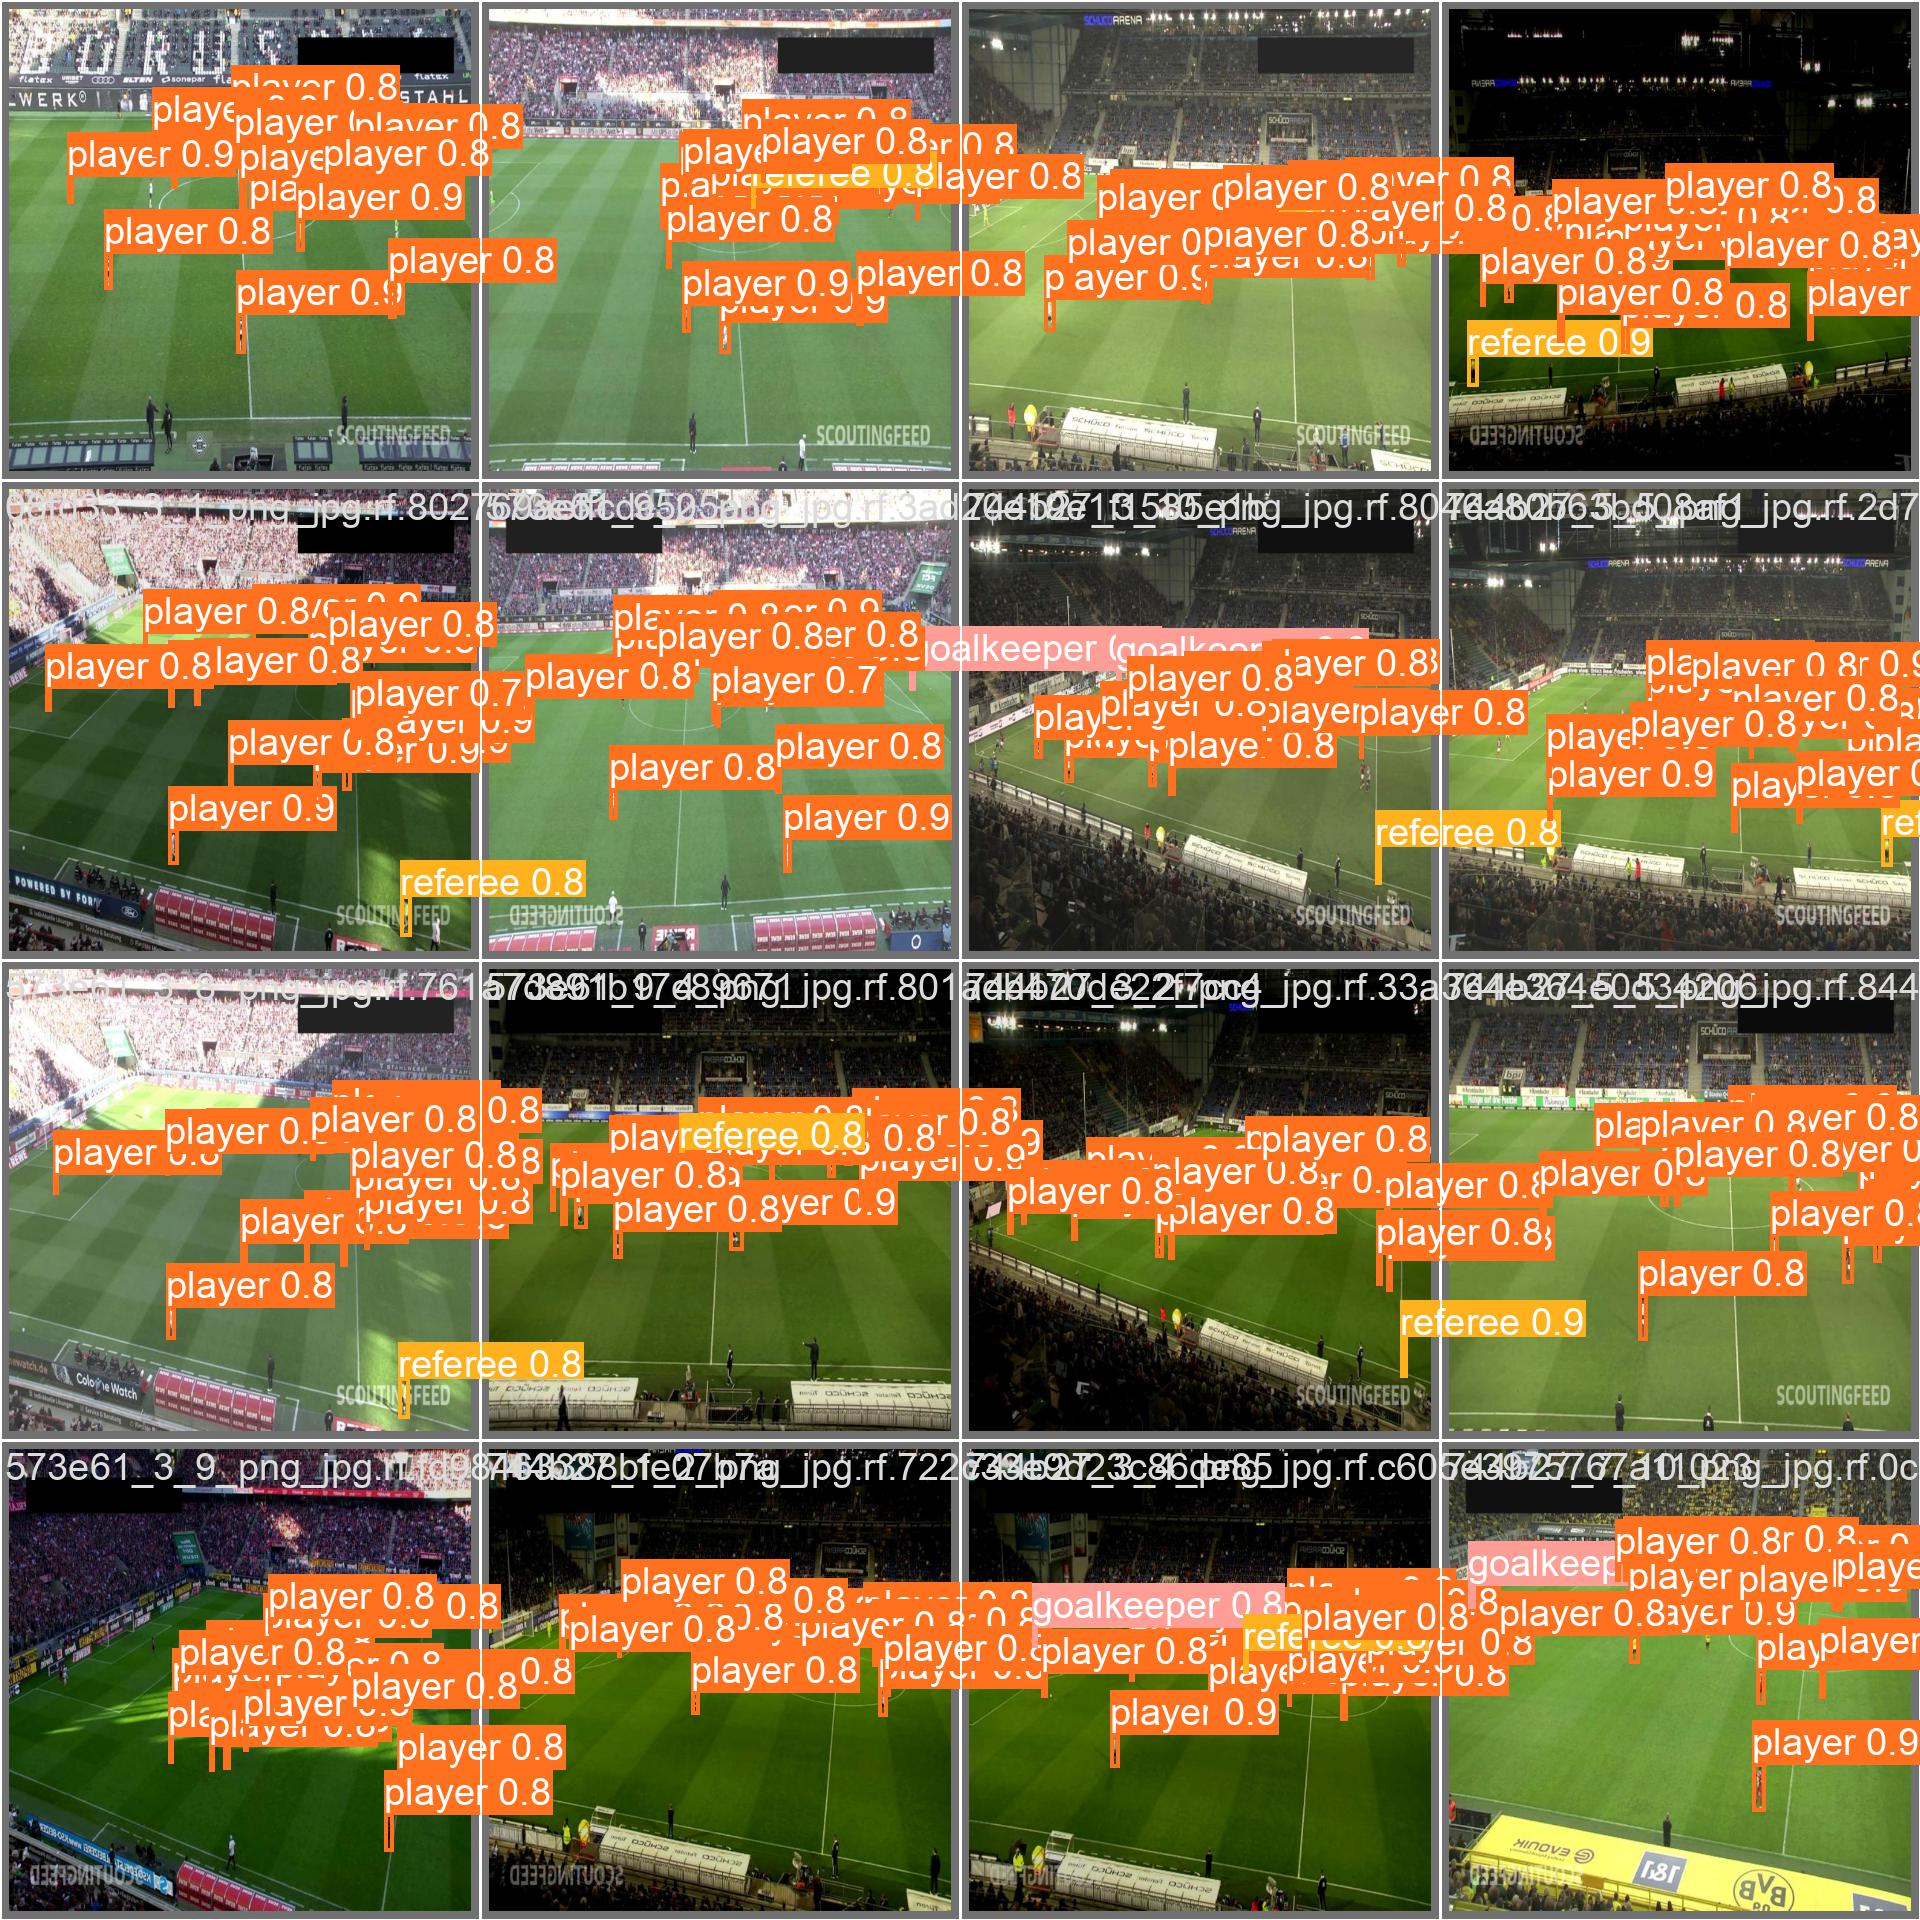

In [ ]:
# print some results
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
# validation model
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-20 12:53:04.840046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 12:53:06.047127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Football-Players-Detection-3/valid/labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100% 66/66 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:11<00:00,  2.20s/it]
                   all         66       1575      0.969      0.774      0.859      0.589
                  ball    

In [ ]:
# list of documents
!ls {HOME}/runs/detect/val/

confusion_matrix.png  R_curve.png	     val_batch1_pred.jpg
F1_curve.png	      val_batch0_labels.jpg  val_batch2_labels.jpg
P_curve.png	      val_batch0_pred.jpg    val_batch2_pred.jpg
PR_curve.png	      val_batch1_labels.jpg


/content


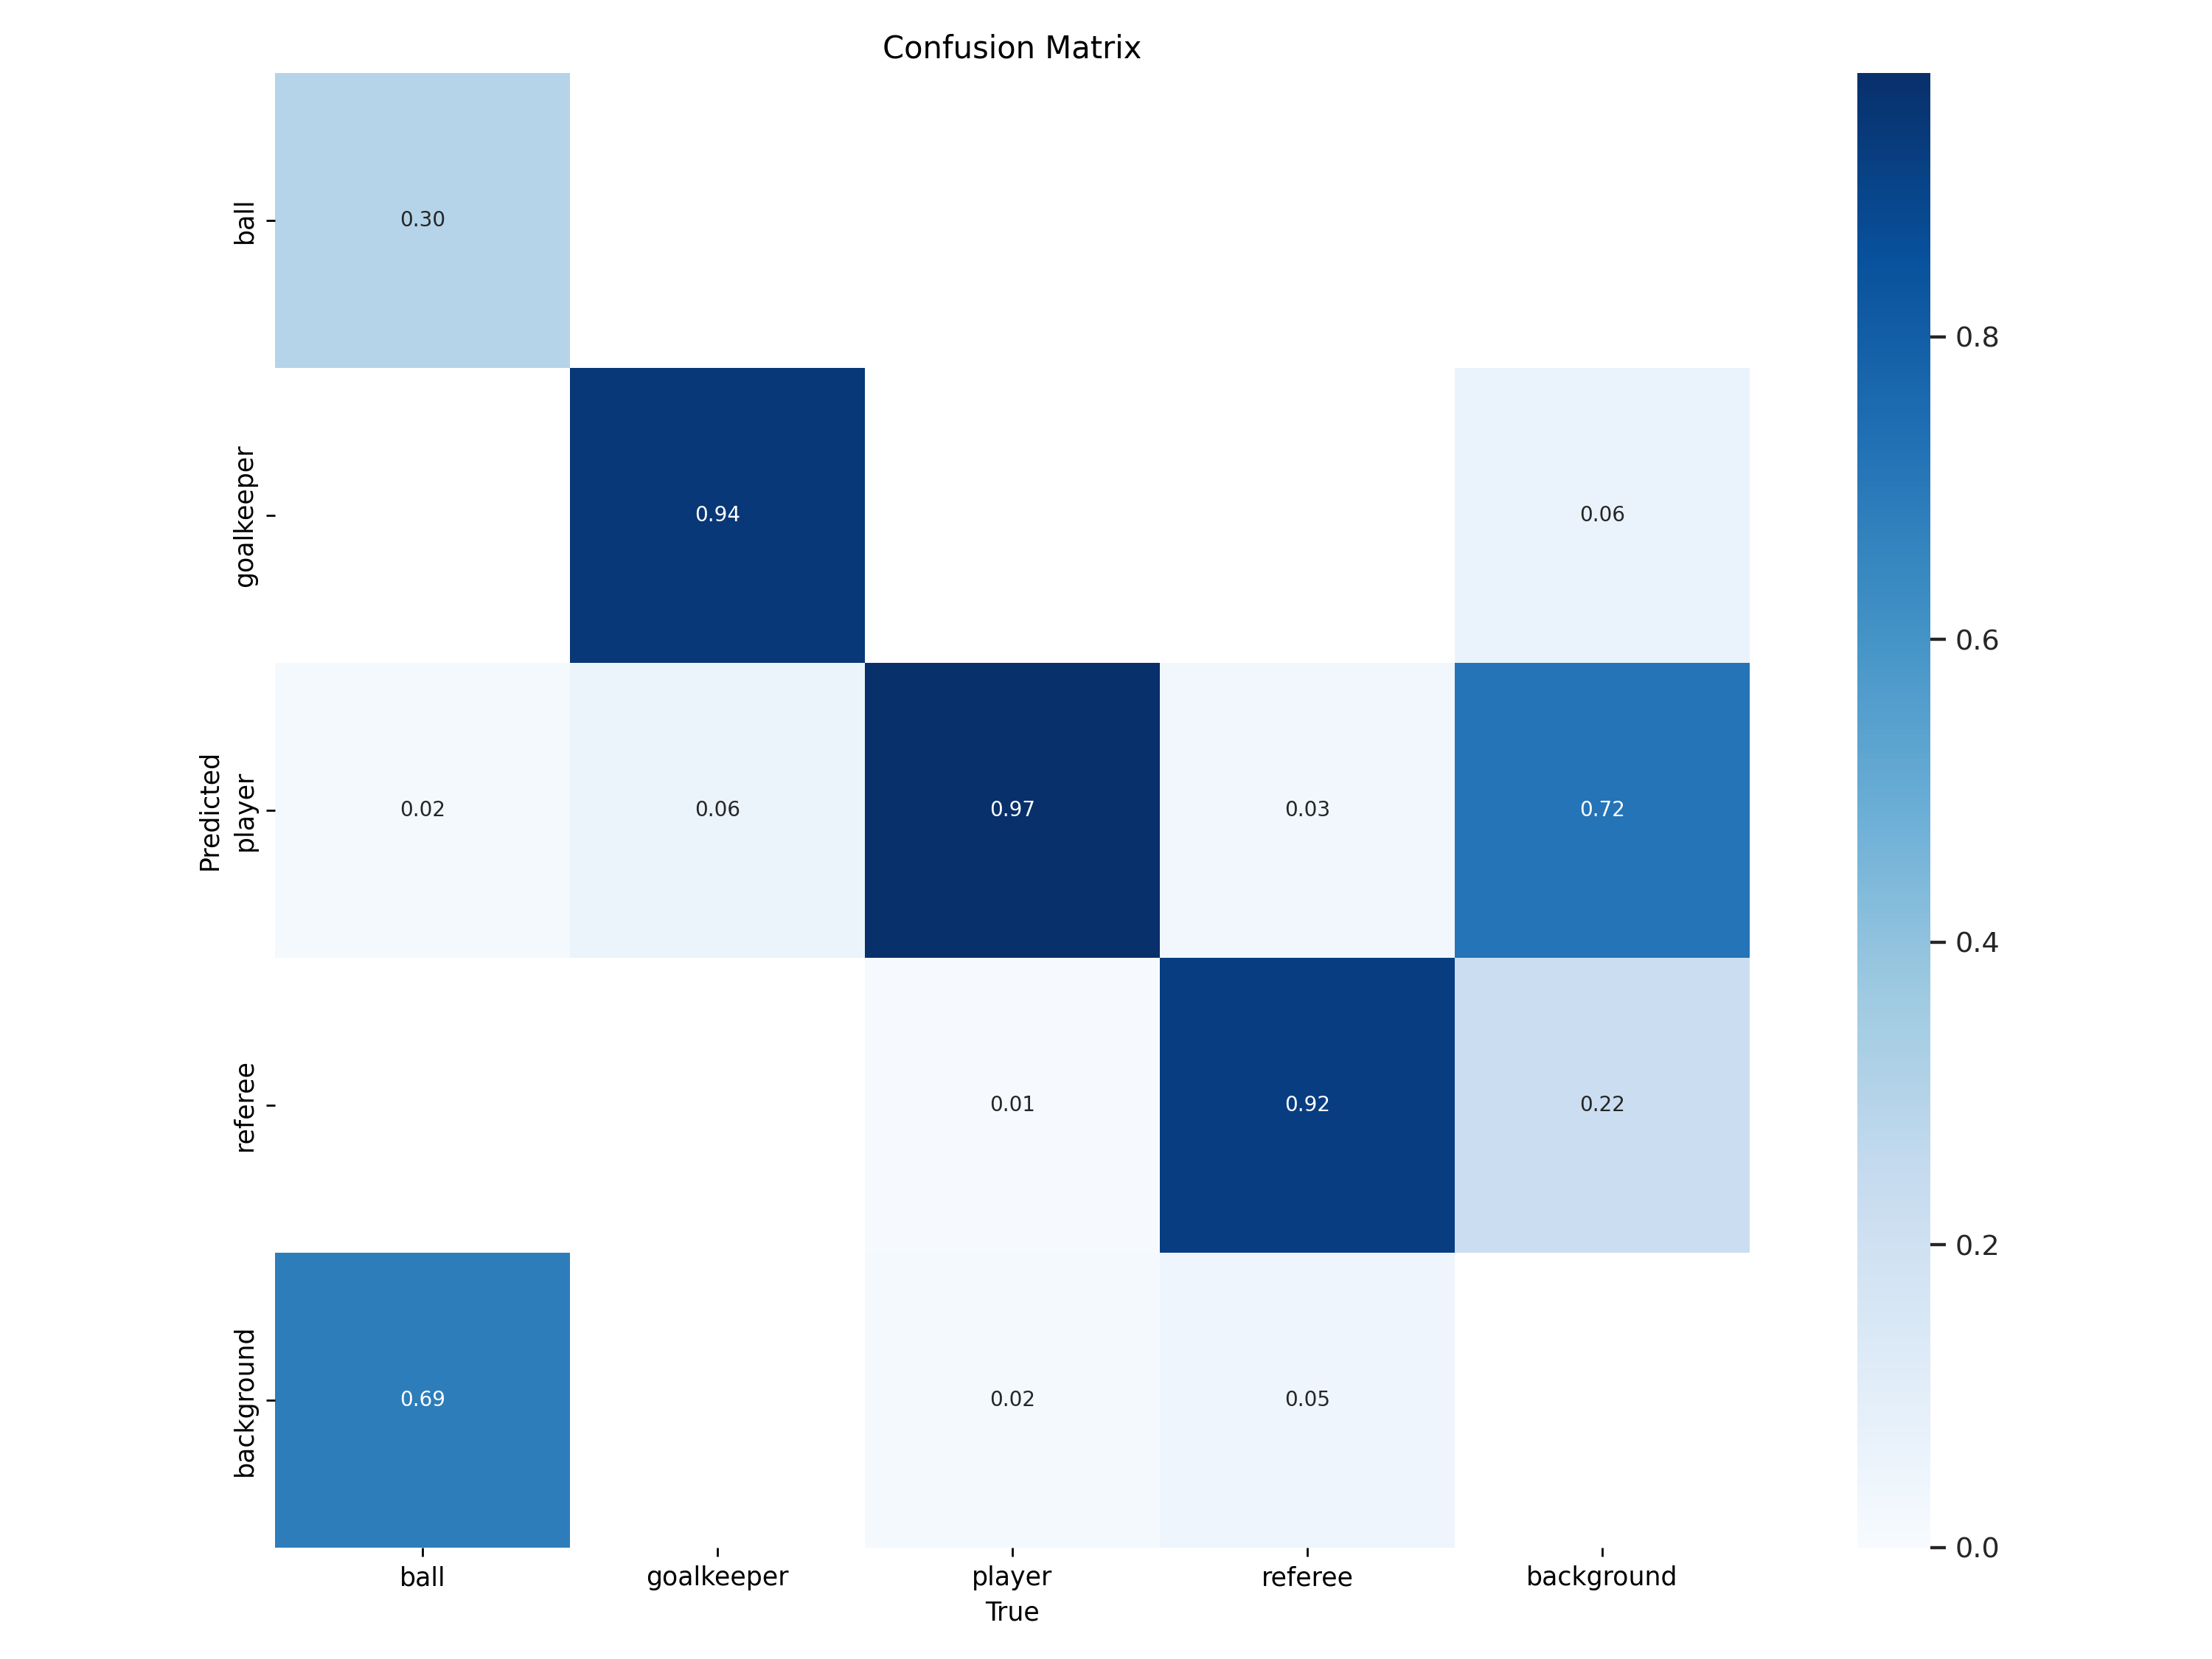

In [ ]:
# print confusion matrix
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

In [ ]:
# predict
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-05-20 12:53:55.612656: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 12:53:56.994348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/66 /content/datasets/Football-Players-Detection-3/test/images/08fd33_3_5_png_jpg.rf.4defe540eabe77bb6d71268318b7907e.jpg: 800x800 20 players, 2 referees, 24.6ms
image 2/66 /content/datasets/Football-Players-Detection-3/test/images/08fd33_6_2_png_jpg.rf.c05a963a7ffe71811b8d15afa4829427.jpg: 800x800 20 players, 2 referees, 24.7ms
image 3/66 /content/datasets/Football-Players-Det

In [ ]:
# video predict
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/video/match.mp4 save=true

2023-05-20 12:55:39.032578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 12:55:39.907564: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/825) /content/video/match.mp4: 480x800 1 ball, 14 players, 2 referees, 90.4ms
video 1/1 (2/825) /content/video/match.mp4: 480x800 13 players, 1 referee, 15.5ms
video 1/1 (3/825) /content/video/match.mp4: 480x800 13 players, 2 referees, 15.4ms
video 1/1 (4/825) /content/video/match.mp4: 480x800 13 players, 15.4ms
video 1/1 (5/825) /content/video/match.mp4: 480x800 12 players, 1 ref